<a href="https://colab.research.google.com/github/sakshamshil/Machine-Learning-Projects/blob/main/Car%20Price%20Prediction/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Work Flow**

Car Data -> Data Pre Processing -> Train Test Split -> Linear & Lasso Regression Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_data = pd.read_csv('/content/car data.csv')
print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking categorical datas
print(car_data['Fuel_Type'].value_counts())
print(car_data['Seller_Type'].value_counts())
print(car_data['Transmission'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
#Changing categorical Values to numerical values -> encoding

car_data = car_data.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2 }, 'Seller_Type' : {'Dealer' : 0, 'Individual' : 1},
                  'Transmission' : {'Manual' : 0, 'Automatic' : 1}})

In [ ]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


Splitting data into features and labels

In [ ]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.1, random_state = 2)

##Model Training

**1. Linear Regression**

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

##Model Evaluation

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#R squared error
r_error_score = metrics.r2_score(Y_train, training_data_prediction)
print(r_error_score)

0.8799451660493711


###Visualizing actual prices vs predicted prices

Text(0, 0.5, 'Predicted Prices')

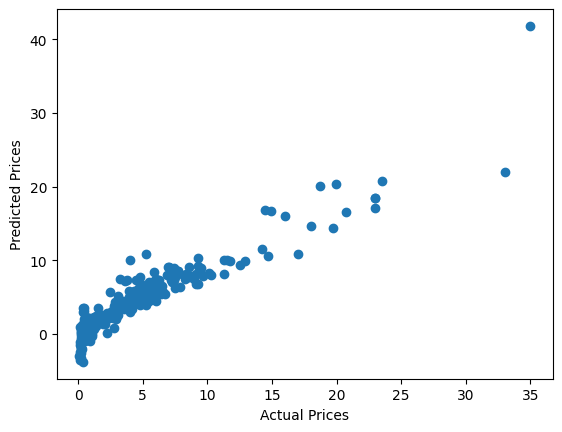

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

####Evaluating test data

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#R squared error
r_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(r_error_score)

0.8365766715027051


Text(0, 0.5, 'Predicted Prices')

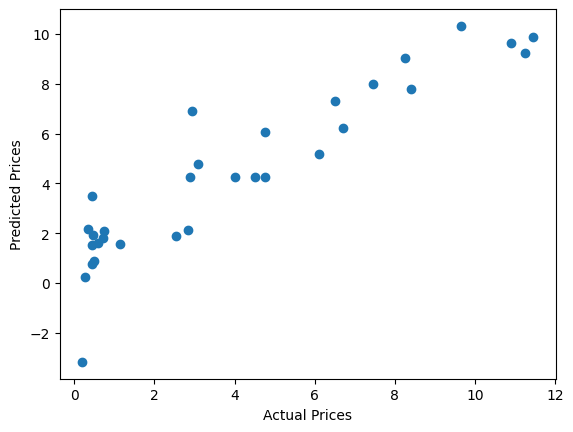

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

#2. Lasso Regression
(lasso regression performs better than linear regression in these cases where there are many features)

In [ ]:
lasso_model = Lasso()

In [ ]:
lasso_model.fit(X_train,Y_train)

Lasso()

##Model Evaluation

In [ ]:
training_data_prediction = lasso_model.predict(X_train)

In [ ]:
#R squared error
r_error_score = metrics.r2_score(Y_train, training_data_prediction)
print(r_error_score)

0.8427856123435794


###Visualizing actual prices vs predicted prices

Text(0, 0.5, 'Predicted Prices')

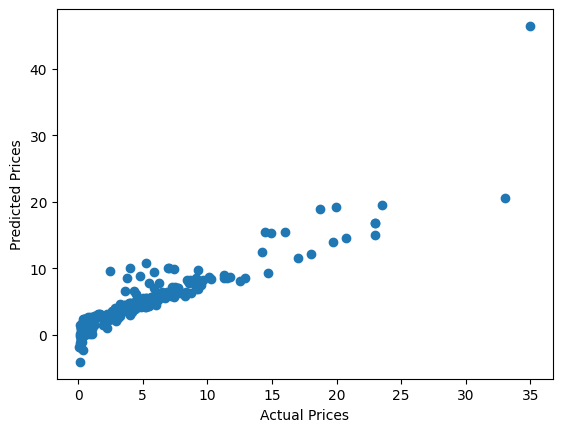

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

####Evaluating test data

In [ ]:
test_data_prediction = lasso_model.predict(X_test)

In [ ]:
#R squared error
r_error_score = metrics.r2_score(Y_test, test_data_prediction)
print(r_error_score)

0.8709167941173195


Text(0, 0.5, 'Predicted Prices')

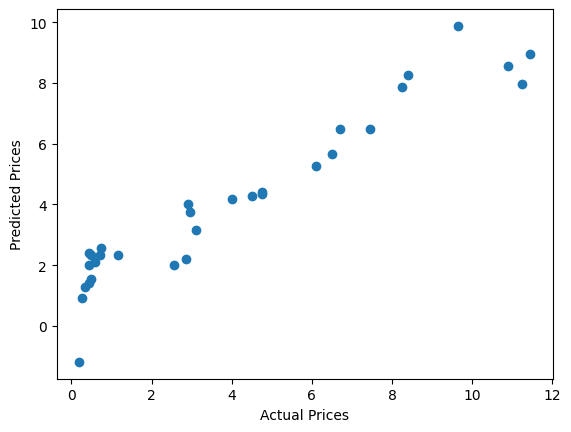

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")